# **Predict Customer Personality to Boost Marketing Campaign**
---

# Import Library

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read Data

In [3]:
# Read data
link = 'https://raw.githubusercontent.com/sabirinID/Predicting-Customer-Personality/main/Dataset/marketing_campaign_data.csv'
df = pd.read_csv(link)

In [4]:
df.sample(n=5, random_state=100)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1514,1514,3865,1977,D3,Bertunangan,20981000.0,0,0,30-04-2013,14,2000,12000,10000,6000,13000,30000,1,3,1,2,8,0,0,0,0,0,0,3,11,1
864,864,4120,1975,D3,Lajang,49514000.0,1,0,17-12-2013,61,88000,39000,78000,58000,13000,93000,2,6,1,4,7,0,0,0,0,0,0,3,11,0
1085,1085,6295,1977,S1,Menikah,54233000.0,0,1,04-02-2013,46,652000,8000,158000,21000,0,142000,4,11,6,5,8,0,0,0,0,0,0,3,11,0
1575,1575,4967,1960,S3,Bertunangan,38201000.0,0,1,29-03-2013,19,233000,0,23000,0,0,12000,4,5,1,5,8,0,0,0,0,0,0,3,11,0
1254,1254,5011,1963,S1,Cerai,68118000.0,0,1,18-10-2013,51,595000,23000,123000,10000,23000,154000,2,8,9,4,6,0,0,0,0,0,0,3,11,0


# 0. Data Understanding

## 0.1. Features Definition

| Feature Name                   | Feature Description        |
|--------------------------------|----------------------------|
|   |   |

Referensi: [Hotel booking demand datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191)

## 0.2. Dimensions of the DataFrame

In [5]:
df.shape

(2240, 30)

In [6]:
print('Dataset ini memiliki dimensi data, yaitu')
print('Jumlah baris: {}'.format(df.shape[0]))
print('Jumlah kolom: {}'.format(df.shape[1]))

Dataset ini memiliki dimensi data, yaitu
Jumlah baris: 2240
Jumlah kolom: 30


## 0.3. Data Types of the Features

In [7]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

🔎 Observasi
- Tipe data: float64, int64, dan object.
- Kolom atau fitur `children`, `city`, `agent`, dan `company` memiliki nilai null.

## 0.4. Detect Missing Values

In [ ]:
# Check the features that have missing values
print(df.isna().values.any())
df.isna().sum().sort_values(ascending=False)

True


company                           112593
agent                              16340
city                                 488
children                               4
hotel                                  0
is_repeated_guest                      0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
previous_bookings_not_canceled         0
previous_cancellations                 0
market_segment                         0
distribution_channel                   0
is_canceled                            0
meal                                   0
babies                                 0
adults                                 0
stays_in_weekdays_nights               0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
arrival_date_wee

In [ ]:
# Summarize missing value
total = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean() * 100, 2).sort_values(ascending=False)

na = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage (%)'])
na = na[na['Total'] > 0]
na.reset_index(inplace=True)
na.rename(columns={'index': 'Feature Name'}, inplace=True)
na

,Feature Name,Total,Percentage (%)
0,company,112593,94.31
1,agent,16340,13.69
2,city,488,0.41
3,children,4,0.00


In [ ]:
total_na = df.isna().sum().sum()
total_na

129425

🔎 Observasi
- Fitur-fitur yang memiliki _missing values_: `company`, `agent`, `city`, dan `children`.
- Jumlah data yang kosong pada fitur `company` sebanyak 94,31%, sehingga kita akan _treating_ "null" sebagai nilai unik atau ditampilkan sebagai salah satu kategori.
- Jumlah data yang kosong pada fitur `agent` sebanyak 13,69% atau lebih dari 10%.
- Namun, kita tidak menganggap nilai "null" dalam fitur `company` dan `agent` sebagai nilai yang hilang, tetapi lebih sebagai "not applicable" yang berarti _booking_ tidak dilakukan oleh travel agent atau company.
- Jumlah data yang kosong pada fitur `city` kurang dari 1%, sehingga kita akan isi dengan "Unknown", karena kota tidak diketahui secara pasti.
- Data yang kosong dalam fitur `children` akan diisi dengan nilai nol, karena kita mengasumsikan bahwa customer dengan nilai "null" tidak memiliki anak.

## 0.5. Detect Duplicate Values

In [ ]:
# Check the features that have duplicate values
print(df.duplicated().any())
df.duplicated().sum()

True


33261

In [ ]:
df.duplicated().value_counts(normalize=True)

False    0.721409
True     0.278591
Name: proportion, dtype: float64

🔎 Observasi
- Jumlah data yang duplikat sebanyak 33.261 baris atau 27,86%, tetapi kita tidak akan melakukan _handling duplicate values_, karena kita berasumsi bahwa data ini merupakan data yang unik.

## 0.6. Number of Unique Classes

In [ ]:
# Count number of unique class
df.nunique().sort_values(ascending=False)

adr                               8879
lead_time                          479
company                            352
agent                              333
city                               177
days_in_waiting_list               128
previous_bookings_not_canceled      73
arrival_date_week_number            53
stays_in_weekdays_nights            35
arrival_date_day_of_month           31
booking_changes                     21
stays_in_weekend_nights             17
previous_cancellations              15
adults                              14
arrival_date_month                  12
market_segment                       8
total_of_special_requests            6
distribution_channel                 5
required_car_parking_spaces          5
meal                                 5
children                             5
babies                               5
customer_type                        4
reservation_status                   3
deposit_type                         3
arrival_date_year        

In [ ]:
values = {'Feature Name': [], 'Unique Classes': []}
for col in df.columns:
    values['Feature Name'].append(col)
    values['Unique Classes'].append(df[col].unique())
    
unique = pd.DataFrame(values)
unique

,Feature Name,Unique Classes
0,hotel,"[Resort Hotel, City Hotel]"
1,is_canceled,"[0, 1]"
2,lead_time,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68..."
3,arrival_date_year,"[2017, 2018, 2019]"
4,arrival_date_month,"[September, October, November, December, Janua..."
5,arrival_date_week_number,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3..."
6,arrival_date_day_of_month,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,stays_in_weekend_nights,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,..."
8,stays_in_weekdays_nights,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,..."
9,adults,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


In [ ]:
undefined = df.applymap(lambda x: 'Undefined' if x == 'Undefined' else '').any()
undefined = undefined[undefined].index.tolist()

print(f"Kolom-kolom dengan nilai 'Undefined': {undefined}")

Kolom-kolom dengan nilai 'Undefined': ['meal', 'market_segment', 'distribution_channel']


In [ ]:
df['meal'].value_counts(normalize=True)

meal
Breakfast     0.773180
Dinner        0.121141
No Meal       0.089203
Undefined     0.009791
Full Board    0.006684
Name: proportion, dtype: float64

In [ ]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: proportion, dtype: float64

In [ ]:
df['distribution_channel'].value_counts(normalize=True)

distribution_channel
TA/TO        0.819750
Direct       0.122665
Corporate    0.055926
GDS          0.001617
Undefined    0.000042
Name: proportion, dtype: float64

🔎 Observasi
- Fitur `hotel` akan diubah namanya menjadi `hotel_type` agar tidak menimbulkan ketidakjelasan atau ambiguitas.
- Selain itu, beberapa fitur lain juga akan diubah namanya, seperti:
    - `is_canceled` → `cancellation_status`,
    - `is_repeated_guest` → `repeated_guest_status`,
    - `arrival_date_year` → `arrival_year`,
    - `arrival_date_month` → `arrival_month`,
    - `arrival_date_week_number` → `arrival_week_number`,
    - `arrival_date_day_of_month` → `arrival_day_of_month`,
    - `previous_cancellations` → `previous_booking_cancellations`,
    - `previous_bookings_not_canceled` → `previous_booking_confirmations`,
    - `agent` → `agent_id`,
    - `company` → `company_id`,
    - `adr` → `average_daily_rate`,
    - `required_car_parking_spaces` → `number_of_parking_spaces_required`.
- Fitur `children`, `agent`, dan `company` seharusnya memiliki tipe data integer.
- Fitur `meal`, `market_segment`, dan `distribution_channel` memiliki kategori "Undefined" dengan persentase kurang dari 1%, sehingga kita akan _mapping_ ke dalam kategori mayoritas atau diklasifikasikan ke dalam kategori tertentu.
- Dalam beberapa kategori, istilah “TA” berarti “Travel Agents” dan “TO” berarti “Tour Operators”.
- Fitur yang menyatakan jumlah tamu atau _guest_, yaitu `adults`, `children`, dan `babies` akan dilakukan analisis lebih lanjut.
- Fitur yang menyatakan jumlah menginap, yaitu `stays_in_weekend_nights` dan `stays_in_weekdays_nights` akan dilakukan analisis lebih lanjut.

## 0.7. Descriptive Statistics

In [ ]:
# Statistics for the columns (features)
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3
top,City Hotel,NaN,NaN,NaN,October,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Breakfast,Kota Denpasar,Online TA,TA/TO,NaN,NaN,NaN,NaN,No Deposit,NaN,NaN,NaN,Personal,NaN,NaN,NaN,Check-Out
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166
mean,NaN,0.370416,104.011416,2018.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN
min,NaN,0.000000,0.000000,2017.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN
25%,NaN,0.000000,18.000000,2018.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN
50%,NaN,0.000000,69.000000,2018.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN
75%,NaN,1.000000,160.000000,2019.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN


🔎 Observasi
- Fitur `adr` atau average daily rate memiliki nilai negatif dan nilai ekstrem yang menunjukkan anomali atau penyimpangan, sehingga kita akan _dropping_ nilai tersebut.

### Numerical Features

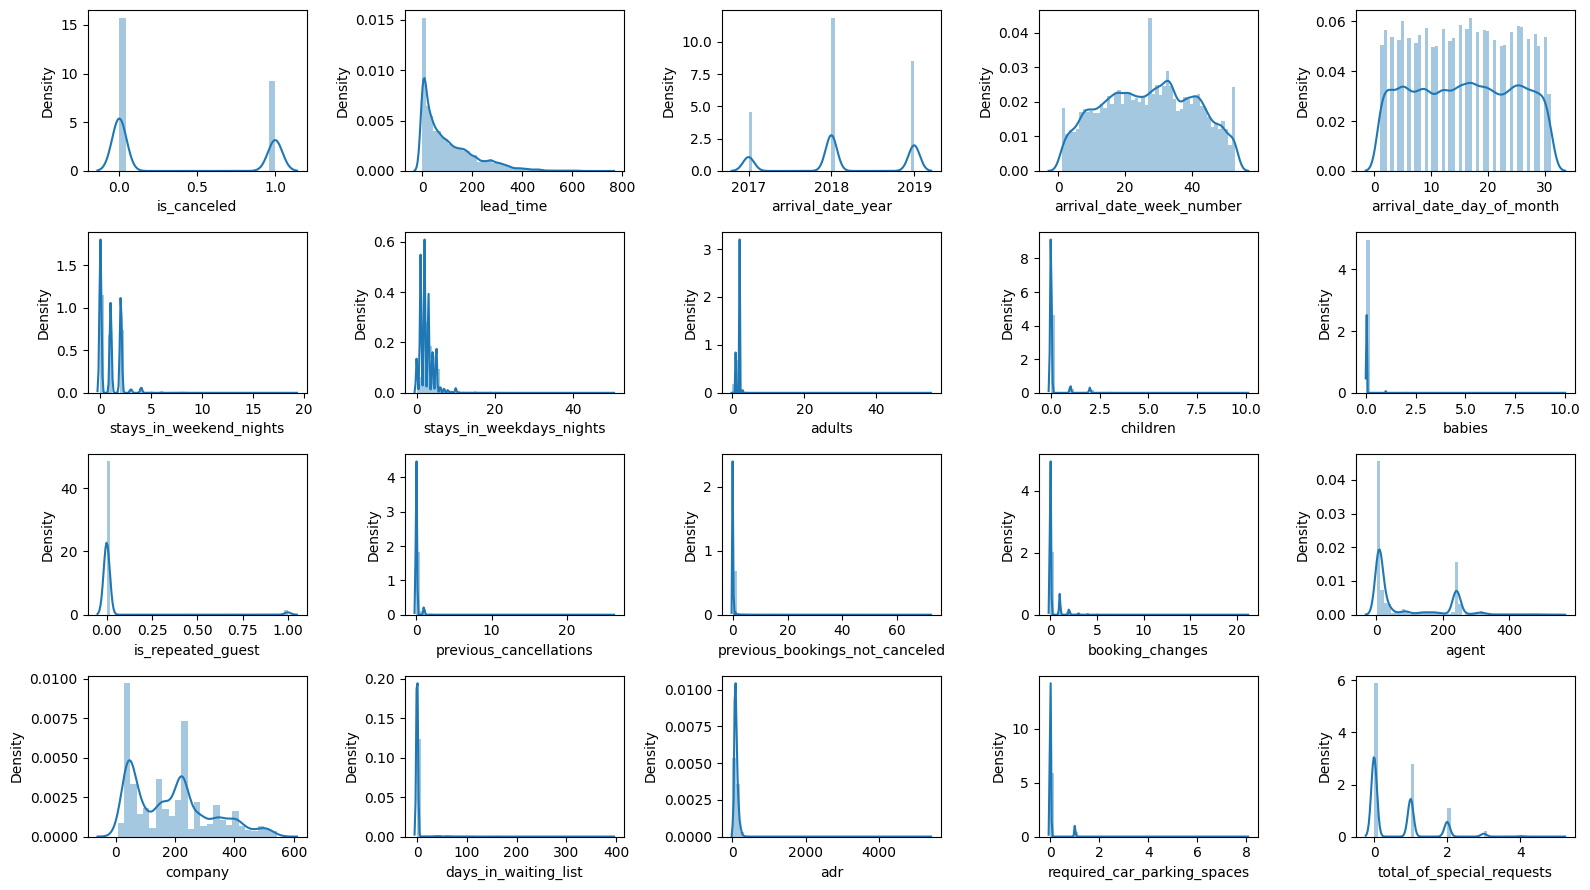

In [ ]:
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'float64')].columns.tolist()

plt.figure(figsize=(16, 9))
for i in range(0, len(nums)):
    plt.subplot(4, 5, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

🔎 Observasi
- Secara umum, fitur-fitur dalam dataset memiliki distribusi yang cenderung _positive skewness_ atau menceng kanan.
- Fitur `arrival_date_week_number` dan `arrival_date_day_of_month` memiliki distribusi yang cenderung normal.

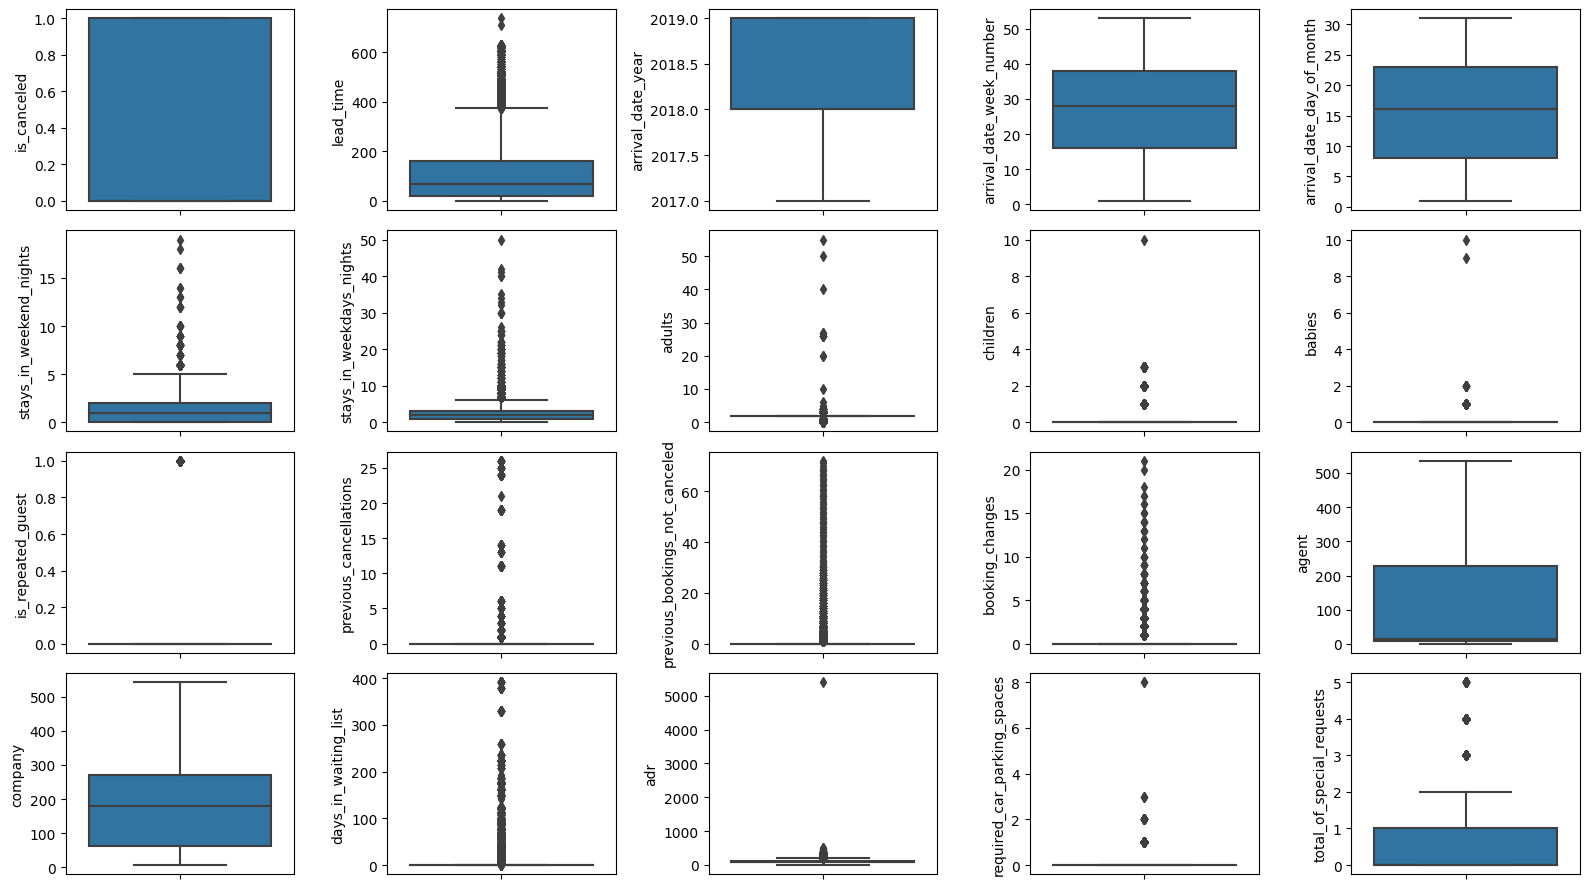

In [ ]:
plt.figure(figsize=(16, 9))
for i in range(0, len(nums)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

🔎 Observasi
- Secara umum, sebagian besar fitur menunjukkan adanya _outlier_.
- Fitur-fitur seperti `children`, `babies`, `adr`, dan `required_car_parking_spaces` menunjukkan adanya nilai yang ekstrem, sehingga kita akan menghilangkan nilai-nilai ekstrem tersebut agar tidak mengurangi _insight_ yang diperoleh dari analisis data.

### Categorical Features

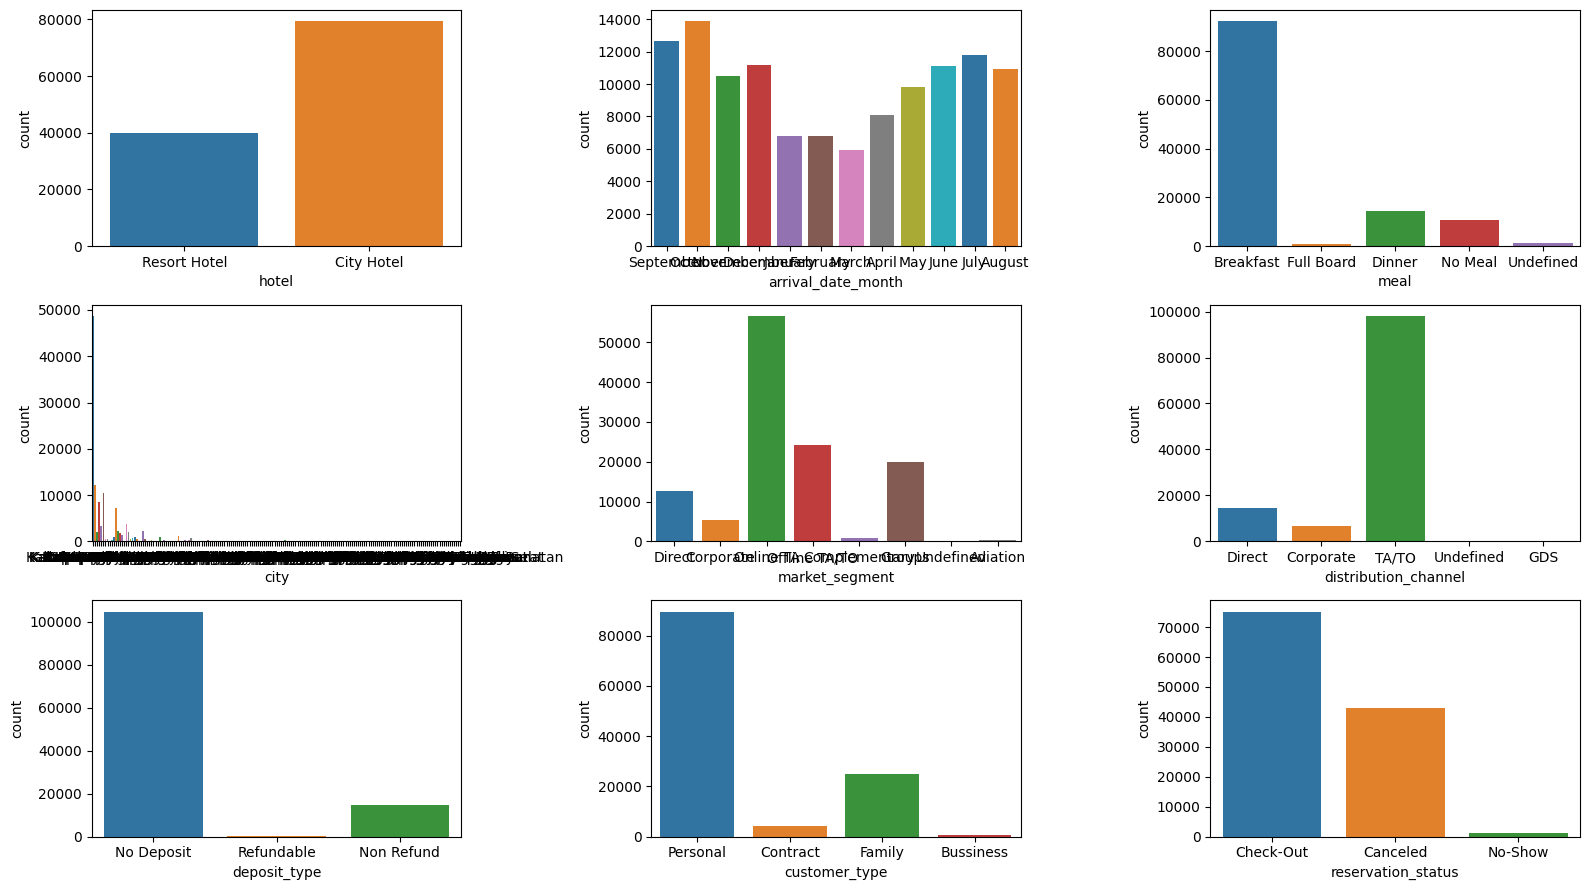

In [ ]:
cats = df.loc[:, (df.dtypes == 'object')].columns.tolist()

plt.figure(figsize=(16, 9))
for i in range(0, len(cats)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[cats[i]], palette='tab10')
    plt.tight_layout()